## **Experiment Analysis - Heatmaps**

In [1]:
from analysis.analysis import get_percentages, get_average_percentages, generate_heatmaps, generate_heatmap
import pandas as pd

exp1a = pd.read_csv('study_data/experiment1-opaque.csv')
exp1b = pd.read_csv('study_data/experiment1-transparent.csv')

### **Heatmaps for participants who answered Q2 correctly**

/Users/irishlad98/Documents/Projects/Data Sampling/sampling code/analysis/analysis.py:116: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/irishlad98/Documents/Projects/Data Sampling/sampling code/analysis/analysis.py:116: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/irishlad98/Documents/Projects/Data Sampling/sampling code/analysis/analysis.py:116: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/irishlad98/Documents/Projects/Data Sampling/sampling code/analysis/analysis.py:116: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/irishlad98/Documents/Projects/Data Sampling/sampling code/analysis/analysis.py:116: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


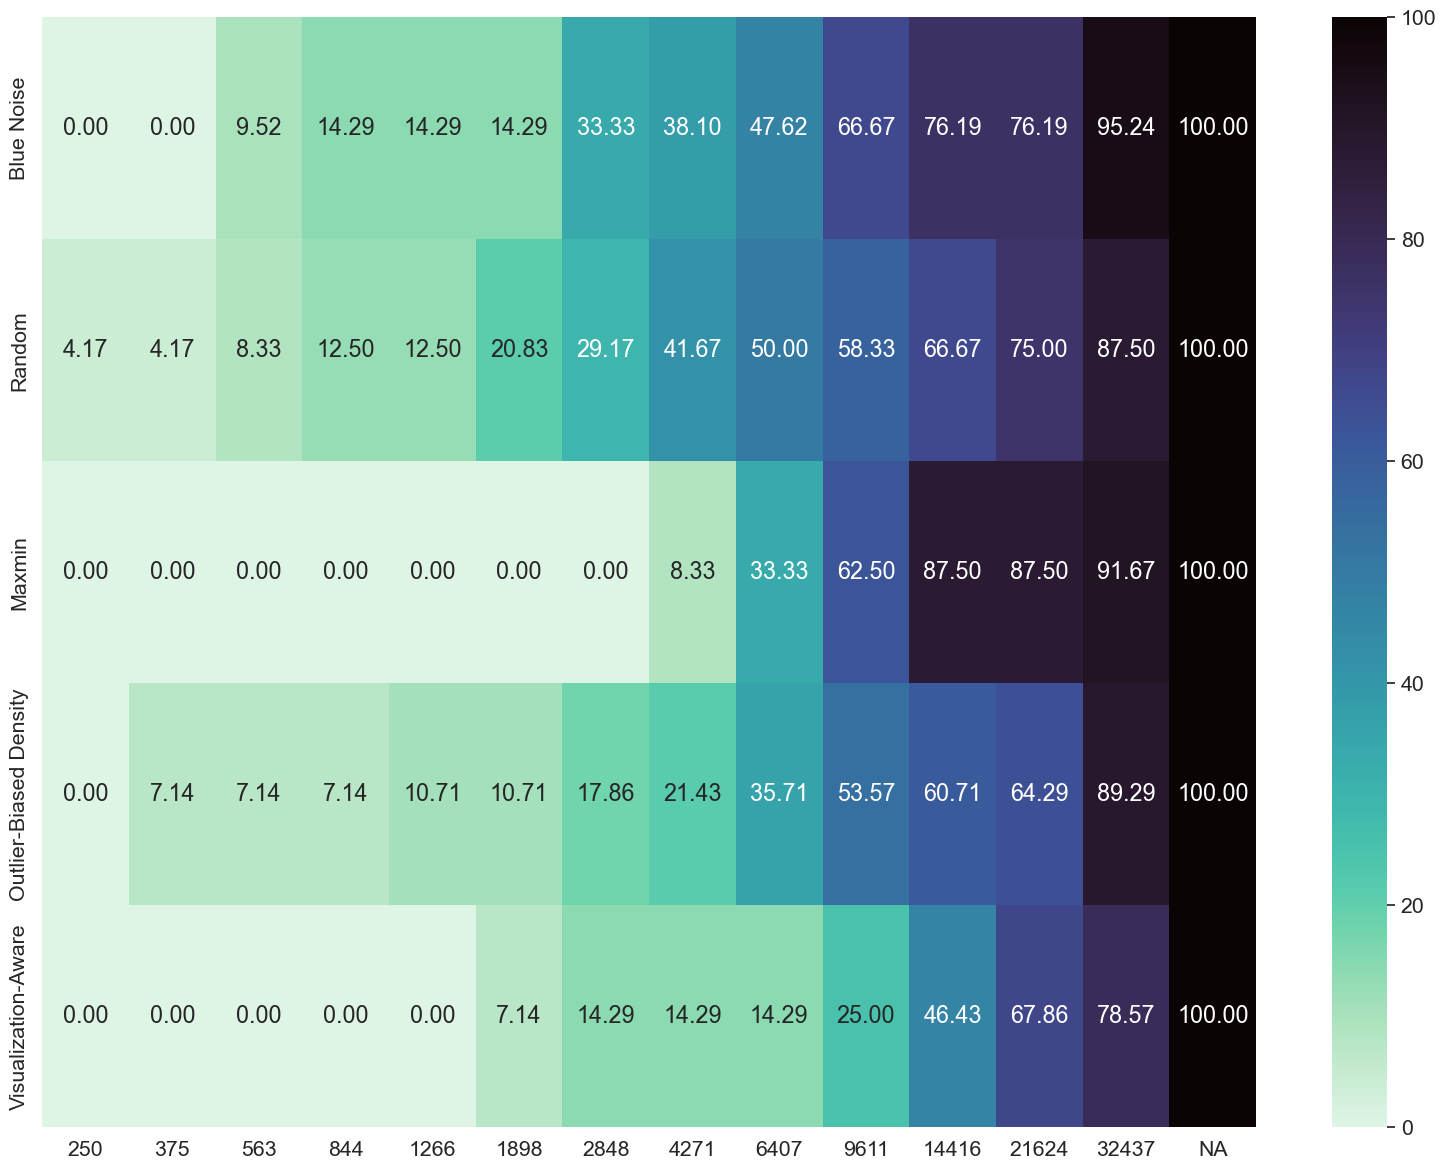

In [2]:
exp1a_correct2 = exp1a[exp1a['check-2'] == 2]
exp1b_correct2 = exp1b[exp1b['check-2'] == 2]

pcntgs_correct2 = get_percentages(exp1a_correct2, exp1b_correct2)
generate_heatmaps(pcntgs_correct2)

### **Average Heatmaps for participants who answered Q2 correctly separated by slider direction**

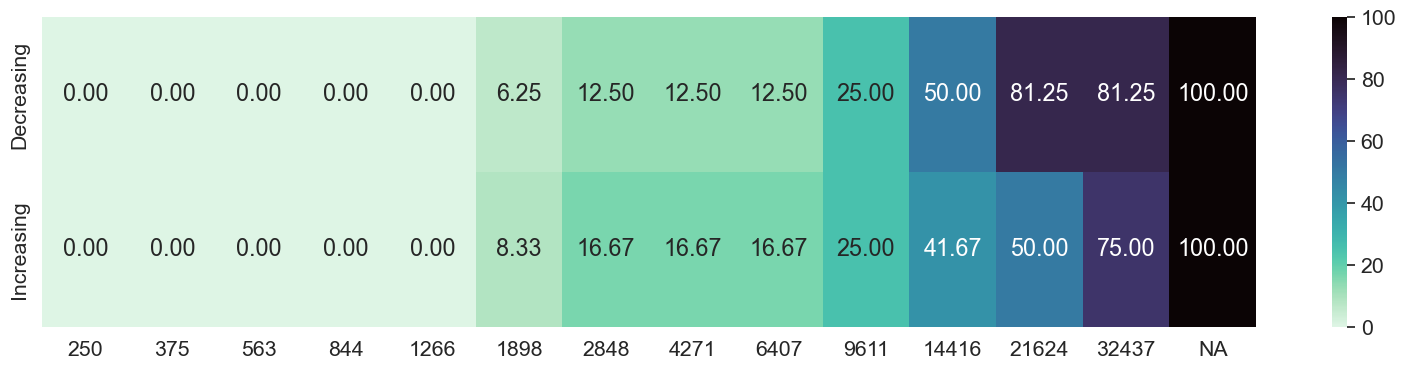

In [7]:
import numpy as np

exp1a_correct2_lts = exp1a_correct2[exp1a_correct2['order'] == 'lts']
exp1b_correct2_lts = exp1b_correct2[exp1b_correct2['order'] == 'lts']

exp1a_correct2_stl = exp1a_correct2[exp1a_correct2['order'] == 'stl']
exp1b_correct2_stl = exp1b_correct2[exp1b_correct2['order'] == 'stl']

avg_pcntgs_correct2_lts = get_average_percentages(exp1a_correct2_lts, exp1b_correct2_lts)
avg_pcntgs_correct2_stl = get_average_percentages(exp1a_correct2_stl, exp1b_correct2_stl)

avg_pcntgs_sliders = np.zeros((2,14))
avg_pcntgs_sliders[0] = avg_pcntgs_correct2_lts.T
avg_pcntgs_sliders[1] = avg_pcntgs_correct2_stl.T

generate_heatmap(avg_pcntgs_sliders, 'study_data/experiment_heatmaps/sliders_heatmap.png', ['Decreasing', 'Increasing'], [16,4])
# generate_heatmap(avg_pcntgs_correct2_stl.reshape(1,14), 'study_data/experiment_heatmaps/overall_correct2_stl_heatmap.png', ['Increasing'])

In [548]:
import numpy as np
print(np.unique(exp1a_correct2['gender'], return_counts=True))
print(exp1a_correct2['age'].mean(), exp1a_correct2['age'].std())
print()
print(np.unique(exp1b_correct2['gender'], return_counts=True))
print(exp1b_correct2['age'].mean(), exp1b_correct2['age'].std())

(array([1, 2, 3]), array([57, 52,  2]))
29.603603603603602 9.673092275416078

(array([1, 2, 3, 6]), array([64, 55,  5,  1]))
29.456 8.924869204788417


### **Experiment 2 Correct Values**

In [112]:
import pandas as pd

apps = pd.read_csv('data/apps/apps_and_games.csv')
fraud = pd.read_csv('data/fraud/credit_card_fraud.csv')
mnist = pd.read_csv('data/mnist/mnist.csv')
pollution = pd.read_csv('data/pollution/pollution.csv')
hidden = pd.read_csv('data/hidden/hidden_corr.csv')

apps = apps.drop(apps.columns.difference(['minInstalls', 'score']), axis=1)
apps = apps.groupby('minInstalls').mean().reset_index()

pollution = pollution.drop(pollution.columns.difference(['State', 'CO AQI']), axis=1)
pollution = pollution.groupby('State').mean().reset_index()

In [66]:
import numpy as np

x, y = 'x', 'y'
mnist[x] = (mnist[x] + np.abs(mnist[x].min())) / (mnist[x].max() - mnist[x].min()) * 3.0
mnist[y] = (mnist[y] + np.abs(mnist[y].min())) / (mnist[y].max() - mnist[y].min()) * 30000

hidden[x] = (hidden[x] + np.abs(hidden[x].min())) / (hidden[x].max() - hidden[x].min()) * 3.0
hidden[y] = (hidden[y] + np.abs(hidden[y].min())) / (hidden[y].max() - hidden[y].min()) * 30000

In [118]:
answers = {}
answers['correlation']  = int(hidden[x].corr(hidden[y]) * 100)                             # Task 1 - Correlation
answers['extremum']     = fraud.max()['amt']                                               # Task 2 - Extremum
answers['clusters']     = 10                                                               # Task 3 - Clusters
answers['distribution'] = 2                                                                # Task 4 - Characterize Distribution
answers['filter']       = '15,16,17,18,19,20,21,22'                                        # Task 5 - Filter
answers['anomalies']    = 2                                                                # Task 6 - Anomalies
answers['derived']      = pollution['CO AQI'].mean()                                       # Task 7 - Compute Derived Value
answers['range_1']      = mnist[mnist[x] < 0.5].min()[y]   # Task 8 - Determine Range
answers['range_2']      = mnist[mnist[x] < 0.5].max()[y]   # Task 8 - Determine Range
answers['retrieve']     = apps[apps['minInstalls'] == 50000]['score'].tolist()[0]          # Task 9 - Retrieve Value
answers['order']     = [1,2,3,4,5,6]                                                      # Task 10 - Order

In [114]:
print(answers)

{'correlation': 73, 'extremum': 28948.9, 'clusters': 10, 'distribution': 2, 'filter': '15,16,17,18,19,20,21,22', 'anomalies': 2, 'derived': 5.1378960218943455, 'range_1': -47.097767, 'range_2': 54.418537, 'retrieve': 2.0585059150513114, 'order': [1, 2, 3, 4, 5, 6]}


### **Experiment 2 Analysis**

In [1]:
import pandas as pd

exp2 = pd.read_csv('study_data/experiment-2.csv')

In [56]:
exp2.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q2', 'extremum', 'clusters',
       'distribution', 'filter', 'anomalies', 'derived', 'range_1', 'range_2',
       'retrieve', 'order_2', 'order_3', 'order_1', 'order_5', 'order_4',
       'order_6', 'vlat-1', 'vlat-2', 'vlat-3', 'vlat-4', 'gender',
       'gender_5_TEXT', 'age', 'education', 'experience_1', 'experience_2',
       'experience_3', 'experience_4', 'Q1', 'Q2.1', 'PROLIFIC_PID',
       'condition', 'method', 'correlation', 'vlat-score', 'score_correlation',
       'score_extremum', 'score_clusters', 'score_derived', 'score_range_1',
       'score_range_2', 'score_retrieve', 'score_distribution',
       'score_anomalies', 'score_order', 'score_filter'],
  

In [378]:
exp2 = exp2.iloc[2:]
exp2.to_csv('study_data/experiment-2.csv', index=False)

In [379]:
exp2['correlation'] = exp2['correlation_1']
exp2 = exp2.drop('correlation_1', axis=1)
exp2.to_csv('study_data/experiment-2.csv', index=False)

In [2]:
exp2['vlat-score'] = (exp2[[f'vlat-{i}' for i in range(1,5)]] == 1).sum(axis=1)
exp2 = exp2[exp2['vlat-score'] >= 3]

In [385]:
print(np.unique(exp2['condition'], return_counts=True))
print(np.unique(exp2[exp2['condition'] == 'A']['method'], return_counts=True))
print(np.unique(exp2[exp2['condition'] == 'B']['method'], return_counts=True))

(array(['A', 'B', 'C'], dtype=object), array([143, 141, 137]))
(array(['blue', 'maxmin', 'outlier', 'random', 'vas'], dtype=object), array([30, 28, 28, 28, 29]))
(array(['blue', 'maxmin', 'outlier', 'random', 'vas'], dtype=object), array([29, 28, 28, 28, 28]))


In [19]:
exp2.shape

(421, 52)

In [20]:
print(np.unique(exp2['gender'], return_counts=True))
print(exp2['age'].mean(), exp2['age'].std())

(array([1, 2, 3]), array([232, 186,   3]))
41.1270783847981 13.770175787031413


In [5]:
import numpy as np
conditions = ['A', 'B']
methods = ['blue', 'maxmin', 'outlier', 'random', 'vas']

def score_continuous_column(column_name, correct_answer):
    exp2[f'score_{column_name}'] = exp2.apply(lambda row: np.abs(row[column_name] - correct_answer), axis=1)

def score_mc_column(column_name, correct_answer):
    exp2[f'score_{column_name}'] = exp2.apply(lambda row: row[column_name] == correct_answer, axis=1)

def score_order():
    C = exp2.apply(lambda row: np.sum([row[f'order_{i}'] < row[f'order_{j}'] for i in range(1,7) for j in range(i+1,7)]), axis=1)
    D = 15 - C
    exp2[f'score_order'] = (C - D) / (C + D)



def score_filter():
    answers = [15,16,17,18,19,20,21,22]
    precision = exp2.apply(lambda row: np.sum([int(ans) in answers for ans in row['filter'].split(',')]) / len(row['filter'].split(',')), axis=1)
    recall = exp2.apply(lambda row: np.sum([int(ans) in answers for ans in row['filter'].split(',')]) / len(answers), axis=1)
    exp2[f'score_filter'] = 2 * precision * recall / (precision + recall)
    exp2[f'score_filter'] = exp2[f'score_filter'].fillna(0)

In [6]:
answers = [73, 28948.9, 10, 5.1378960218943455, 6969.3333329534835, 23630.593792937823, 2.0585059150513114]
tasks = ['correlation', 'extremum', 'clusters', 'derived', 'range_1', 'range_2', 'retrieve']

for i in range(len(answers)):
    score_continuous_column(tasks[i], answers[i])

answers = [2, 2]
tasks = ['distribution', 'anomalies']

for i in range(len(answers)):
    score_mc_column(tasks[i], answers[i])

score_order()
score_filter()

In [394]:
exp2.to_csv('study_data/experiment-2-scored.csv', index=False)

In [7]:
aggregate_data = []
for condition in ['A', 'B']:
    for method in ['blue', 'maxmin', 'outlier', 'random', 'vas']:
        subset_a = exp2[(exp2['condition'] == condition) & (exp2['method'] == method)]
        for task in ['correlation', 'extremum', 'clusters', 'derived', 'range_1', 'range_2', 'retrieve', 'filter', 'order']:
            stdev = subset_a[f'score_{task}'].std()
            mean = subset_a[f'score_{task}'].mean()
            if stdev == 0:
                subset_d = subset_a.copy()
            else:
                subset_d = subset_a[(subset_a[f'score_{task}'] >= mean-2*stdev) & (subset_a[f'score_{task}'] <= mean+2*stdev)]
            agg_row = [condition, method, task, subset_d[f'score_{task}'].mean(), subset_d[f'score_{task}'].std() / np.sqrt(subset_d.shape[0]), 'na', 'na', 'na', 'na']
            aggregate_data.append(agg_row)
        for task in ['distribution', 'anomalies']:
            agg_row = [condition, method, task, 'na', 'na', subset_a[f'score_{task}'].sum() / subset_a.shape[0] * 100]
            for i in range(3,7):
                agg_row.append(subset_a[subset_a[task] <= i].shape[0] / subset_a.shape[0] * 100)
            aggregate_data.append(agg_row)

subset_a = exp2[exp2['condition'] == 'C']
for task in ['correlation', 'extremum', 'clusters', 'derived', 'range_1', 'range_2', 'retrieve', 'filter', 'order']:
    stdev = subset_a[f'score_{task}'].std()
    mean = subset_a[f'score_{task}'].mean()
    subset_d = subset_a[(subset_a[f'score_{task}'] >= mean-2*stdev) & (subset_a[f'score_{task}'] <= mean+2*stdev)]
    agg_row = ['C', 'na', task, subset_d[f'score_{task}'].mean(), subset_d[f'score_{task}'].std() / np.sqrt(subset_d.shape[0]), 'na', 'na', 'na', 'na']
    aggregate_data.append(agg_row)
for task in ['distribution', 'anomalies']:
    agg_row = ['C', 'na', task, 'na', 'na', subset_a[f'score_{task}'].sum() / subset_a.shape[0] * 100]
    for i in range(3,7):
        agg_row.append(subset_d[subset_d[task] <= i].shape[0] / subset_d.shape[0] * 100)
    aggregate_data.append(agg_row)

agg_df = pd.DataFrame(aggregate_data, columns=['condition','method','task','mean_error','std_error','percentage_correct','percentage_3','percentage_4','percentage_5','percentage_6'])

In [489]:
agg_df.to_csv('static/experiment-2-aggregate.csv', index=False)

In [23]:
import pandas as pd
agg_df = pd.read_csv('static/experiment-2-aggregate.csv')

In [508]:
agg_df_compute = agg_df.copy()

### **Normalized Distance from Control**

In [40]:
pd.options.mode.chained_assignment = None
for task in ['correlation', 'extremum', 'clusters', 'distribution', 'filter', 'anomalies', 'derived', 'range_1', 'range_2', 'retrieve', 'order']:
    
    agg_subset_A = agg_df[(agg_df['task'] == task) & (agg_df['condition'] == 'A') & (agg_df['method'] == 'maxmin')]
    # print(agg_subset_A)
    agg_subset_B = agg_df[(agg_df['task'] == task) & (agg_df['condition'] == 'B') & (agg_df['method'] != 'maxmin')]
    agg_subset_C = agg_df[(agg_df['task'] == task) & (agg_df['condition'] == 'C')]
    if task == 'distribution' or task == 'anomalies':
        print(task)
        
        distance_from_control_B = agg_subset_B[['method', 'percentage_correct']]#.to_frame().join((agg_subset_B['percentage_correct'] - agg_subset_C['percentage_correct'].tolist()[0]).abs())
        distance_from_control_B['percentage_correct'] -= agg_subset_C['percentage_correct'].tolist()[0]
        distance_from_control_B['percentage_correct'] = distance_from_control_B['percentage_correct'].abs()

        distance_from_control_A = agg_subset_A[['method', 'percentage_correct']]
        distance_from_control_A['percentage_correct'] -= agg_subset_C['percentage_correct'].tolist()[0]
        distance_from_control_A['percentage_correct'] = distance_from_control_A['percentage_correct'].abs()

        distance_from_control_B = pd.concat([distance_from_control_B, distance_from_control_A])
        distance_from_control_B['percentage_correct'] = (distance_from_control_B['percentage_correct'] - distance_from_control_B['percentage_correct'].min()) / (distance_from_control_B['percentage_correct'].max() - distance_from_control_B['percentage_correct'].min())
        print(distance_from_control_B.sort_values('percentage_correct'))
    elif task == 'filter' or task == 'order':
        print(task)
        distance_from_control_B = agg_subset_B[['method', 'mean_error']]
        distance_from_control_B['mean_error'] -= agg_subset_C['mean_error'].tolist()[0]
        distance_from_control_B['mean_error'] = distance_from_control_B['mean_error'].abs()

        distance_from_control_A = agg_subset_A[['method', 'mean_error']]
        distance_from_control_A['mean_error'] -= agg_subset_C['mean_error'].tolist()[0]
        distance_from_control_A['mean_error'] = distance_from_control_A['mean_error'].abs()

        distance_from_control_B = pd.concat([distance_from_control_B, distance_from_control_A])
        distance_from_control_B['mean_error'] = 1 - distance_from_control_B['mean_error']
        print(distance_from_control_B.sort_values('mean_error'))
    else:
        print(task)
        distance_from_control_B = agg_subset_B[['method', 'mean_error']]
        distance_from_control_B['mean_error'] -= agg_subset_C['mean_error'].tolist()[0]
        distance_from_control_B['mean_error'] = distance_from_control_B['mean_error'].abs()

        distance_from_control_A = agg_subset_A[['method', 'mean_error']]
        distance_from_control_A['mean_error'] -= agg_subset_C['mean_error'].tolist()[0]
        distance_from_control_A['mean_error'] = distance_from_control_A['mean_error'].abs()

        distance_from_control_B = pd.concat([distance_from_control_B, distance_from_control_A])
        distance_from_control_B['mean_error'] = (distance_from_control_B['mean_error'] - distance_from_control_B['mean_error'].min()) / (distance_from_control_B['mean_error'].max() - distance_from_control_B['mean_error'].min())
        print(distance_from_control_B.sort_values('mean_error'))
    #     distance_from_control_B = agg_subset_B['method'].to_frame().join((agg_subset_B['mean_error'] - agg_subset_C['mean_error'].tolist()[0]).abs())
    #     print(agg_df[(agg_df['task'] == task) & (agg_df['condition'] == 'B')]['method'].to_frame().join((agg_df[(agg_df['task'] == task) & (agg_df['condition'] == 'B')]['mean_error'] - agg_df[(agg_df['task'] == task) & (agg_df['condition'] == 'C')]['mean_error'].tolist()[0]).abs()).sort_values('mean_error'))

correlation
     method mean_error
11   maxmin        0.0
99      vas   0.073361
88   random   0.773706
55     blue   0.895554
77  outlier        1.0
extremum
      method mean_error
100      vas        0.0
12    maxmin   0.050805
89    random   0.761337
56      blue    0.90785
78   outlier        1.0
clusters
      method mean_error
101      vas        0.0
57      blue   0.212379
13    maxmin   0.314414
79   outlier   0.355676
90    random        1.0
distribution
      method percentage_correct
86   outlier                0.0
108      vas                0.0
20    maxmin                0.0
64      blue           0.971496
97    random                1.0
filter
      method mean_error
62      blue    0.53087
84   outlier   0.776325
95    random   0.858941
18    maxmin   0.981155
106      vas   0.989611
anomalies
      method percentage_correct
87   outlier                0.0
109      vas                0.0
65      blue           0.309206
21    maxmin           0.323113
98    random      

In [119]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_1samp, ttest_ind

for task in ['correlation', 'extremum', 'clusters', 'derived', 'range_1', 'range_2', 'retrieve', 'filter', 'order']:
    for condition in ['A', 'B']:
        print(condition)
        model = ols(
            f'score_{task} ~ C(method)',
            data=exp2[(exp2['condition'] == condition)]
            ).fit()

        result = sm.stats.anova_lm(model, type=2)
        print(task)
        print(result)
        if result['PR(>F)'].iloc[0] < 0.05:
            for method in methods:
                print(method, exp2[(exp2['condition'] == condition) & (exp2['method'] == method)][f'score_{task}'].mean())
            tukey = pairwise_tukeyhsd(endog=exp2[exp2['condition'] == condition][f'score_{task}'], groups=exp2[exp2['condition'] == condition]['method'], alpha=0.05)
            print(tukey)
        print()

        if task != 'filter' and task != 'order':
            print('t-tests against control')
            for method in methods:
                tvalue, pvalue = ttest_ind(exp2[(exp2['condition'] == condition) & (exp2['method'] == method)][task], exp2[(exp2['condition'] == 'C')][task], equal_var=False)
                print( method, 't =',tvalue, 'p =', pvalue)
            print()
            print('t-tests against ground truth')
            for method in methods:
                tvalue, pvalue = ttest_1samp(exp2[(exp2['condition'] == condition) & (exp2['method'] == method)][task], answers[task])
                print(method, 't =',tvalue, 'p =', pvalue)
            print()

A
correlation
              df        sum_sq      mean_sq         F        PR(>F)
C(method)    4.0  12492.717923  3123.179481  9.586857  7.184956e-07
Residual   138.0  44957.254105   325.777204       NaN           NaN
blue 16.833333333333332
maxmin 34.5
outlier 17.321428571428573
random 15.142857142857142
vas 36.3448275862069
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
   blue  maxmin  17.6667 0.0026   4.5567 30.7766   True
   blue outlier   0.4881    1.0 -12.6218  13.598  False
   blue  random  -1.6905 0.9965 -14.8004 11.4195  False
   blue     vas  19.5115 0.0005    6.519  32.504   True
 maxmin outlier -17.1786 0.0045 -30.5126 -3.8445   True
 maxmin  random -19.3571 0.0009 -32.6912 -6.0231   True
 maxmin     vas   1.8448 0.9953 -11.3738 15.0634  False
outlier  random  -2.1786 0.9913 -15.5126 11.1555  False
outlier     vas  19.0234  0.001   5.8048  32.242   True


In [106]:
sample_sizes_B = {
    'apps_and_games': { 'blue': 32437, 'random': 32437, 'maxmin': 32437, 'outlier': 21624, 'vas': 32437 },
    'credit_card_fraud': { 'blue': 32437, 'random': 32437, 'maxmin': 6407, 'outlier': 32437, 'vas': 9611 },
    'mnist': { 'blue': 6407, 'random': 9611, 'maxmin': 6407, 'outlier': 14416, 'vas': 14416 },
    'pollution': { 'blue': 32437, 'random': 14416, 'maxmin': 32437, 'outlier': 21624, 'vas': 32437 },
    'hidden_corr': { 'blue': 14416, 'random': 21624, 'maxmin': 14416, 'outlier': 32437, 'vas': 32437 }
}

In [107]:
for dset in sample_sizes_B.keys():
    print(dset)

apps_and_games
credit_card_fraud
mnist
pollution
hidden_corr


In [111]:
sample_answers = {}
for task in ['correlation', 'extremum', 'clusters', 'derived', 'range_1', 'range_2', 'retrieve', 'filter', 'order']:
    sample_answers[task] = {}
    for method in methods:
        sample_answers[task][method] = {}

In [160]:
from sampling.utils import load_to_df

for dataset in sample_sizes_B.keys():
    for method in methods:
        props = {'x': 'x', 'y': 'y', 'attrib': 'labels'}
        sample_A = load_to_df(f'sample_data/{dataset}_{method}_4271.npy', props)
        sample_B = load_to_df(f'sample_data/{dataset}_{method}_{sample_sizes_B[dataset][method]}.npy', props)

        if dataset == 'apps_and_games' or dataset == 'pollution':
            sample_A = sample_A.drop(sample_A.columns.difference(['x', 'y']), axis=1)
            sample_A = sample_A.groupby('x').mean().reset_index()

            sample_B = sample_B.drop(sample_B.columns.difference(['x', 'y']), axis=1)
            sample_B = sample_B.groupby('x').mean().reset_index()

        if dataset == 'mnist' or dataset == 'hidden_corr':
            sample_A['x'] = (sample_A['x'] + np.abs(sample_A['x'].min())) / (sample_A['x'].max() - sample_A['x'].min()) * 3.0
            sample_A['y'] = (sample_A['y'] + np.abs(sample_A['y'].min())) / (sample_A['y'].max() - sample_A['y'].min()) * 30000

            sample_B['x'] = (sample_B['x'] + np.abs(sample_B['x'].min())) / (sample_B['x'].max() - sample_B['x'].min()) * 3.0
            sample_B['y'] = (sample_B['y'] + np.abs(sample_B['y'].min())) / (sample_B['y'].max() - sample_B['y'].min()) * 30000

        if dataset == 'apps_and_games':
            # filter 
            sample_answers['filter'][method]['A'] = sample_A[sample_A['y'] > 4]['x'].tolist()
            sample_answers['filter'][method]['B'] = sample_B[sample_B['y'] > 4]['x'].tolist()

            # retrieve
            sample_answers['retrieve'][method]['A'] = sample_A[sample_A['x'] == 50000]['x'].tolist()[0]
            sample_answers['retrieve'][method]['B'] = sample_B[sample_B['x'] == 50000]['x'].tolist()[0]
            
            pass
        elif dataset == 'credit_card_fraud':
            # extremum
            sample_answers['extremum'][method]['A'] = sample_A['y'].max()
            sample_answers['extremum'][method]['B'] = sample_B['y'].max()
            pass
        elif dataset == 'mnist':

            # range_1
            sample_answers['range_1'][method]['A'] = sample_A[sample_A['x'] < 0.5]['y'].min()
            sample_answers['range_1'][method]['B'] = sample_B[sample_B['x'] < 0.5]['y'].min()

            # range_2
            sample_answers['range_2'][method]['A'] = sample_A[sample_A['x'] < 0.5]['y'].max()
            sample_answers['range_2'][method]['B'] = sample_B[sample_B['x'] < 0.5]['y'].max()
        elif dataset == 'pollution':
            # derived
            sample_answers['derived'][method]['A'] = sample_A['y'].mean()
            sample_answers['derived'][method]['B'] = sample_B['y'].mean()
        else:
            # correlation
            sample_answers['correlation'][method]['A'] = sample_A['x'].corr(sample_A['y'])
            sample_answers['correlation'][method]['B'] = sample_B['x'].corr(sample_B['y'])
    

In [168]:
sample_answers['clusters']['blue']['A'] = 11
sample_answers['clusters']['blue']['B'] = 11
sample_answers['clusters']['maxmin']['A'] = 7
sample_answers['clusters']['maxmin']['B'] = 10
sample_answers['clusters']['outlier']['A'] = 5
sample_answers['clusters']['outlier']['B'] = 10
sample_answers['clusters']['random']['A'] = 11
sample_answers['clusters']['random']['B'] = 10
sample_answers['clusters']['vas']['A'] = 4
sample_answers['clusters']['vas']['B'] = 7

In [129]:
sample_answers['order']['blue']['A'] = [1,2,3,6,4,5]
sample_answers['order']['blue']['B'] = [1,2,3,4,5,6]
sample_answers['order']['maxmin']['A'] = [1,2,3,5,6,4]
sample_answers['order']['maxmin']['B'] = [1,2,3,6,5,4]
sample_answers['order']['outlier']['A'] = [1,3,2,6,5,4]
sample_answers['order']['outlier']['B'] = [1,2,3,4,6,5]
sample_answers['order']['random']['A'] = [1,2,3,4,5,6]
sample_answers['order']['random']['B'] = [1,2,3,4,5,6]
sample_answers['order']['vas']['A'] = [1,2,3,4,5,6]
sample_answers['order']['vas']['B'] = [1,2,3,6,5,4]

In [164]:
sample_answers['filter']['blue']['A'] = [16,17,18]
sample_answers['filter']['blue']['B'] = [15,16,17,18]
sample_answers['filter']['maxmin']['A'] = [16,17,18,19,20,21,22]
sample_answers['filter']['maxmin']['B'] = [16,17,18,19,20,21,22]
sample_answers['filter']['outlier']['A'] = [14,15,16,18]
sample_answers['filter']['outlier']['B'] = [16,17,18,19]
sample_answers['filter']['random']['A'] = [14,15,16,20]
sample_answers['filter']['random']['B'] = [15,16,17,18,20,22]
sample_answers['filter']['vas']['A'] = [16,17,18,19,20,21,22]
sample_answers['filter']['vas']['B'] = [16,17,18,19,20,21,22]

In [171]:
def score_sample_continuous_column(column_name, method, condition, correct_answer):
    exp2[f'score_{method}_{condition}_{column_name}'] = exp2.apply(lambda row: np.abs(row[column_name] - correct_answer), axis=1)


def score_sample_order(method, condition, correct_order):
    C = exp2.apply(lambda row: np.sum([(row[f'order_{i}'] < row[f'order_{j}']) if correct_order[i-1] < correct_order[j-1] else (row[f'order_{j}'] < row[f'order_{i}']) for i in range(1,7) for j in range(i+1,7)]), axis=1)
    D = 15 - C
    exp2[f'score_{condition}_{method}_order'] = (C - D) / (C + D)

def score_sample_filter(method, condition, correct_answer):
    precision = exp2.apply(lambda row: np.sum([int(ans) in correct_answer for ans in row['filter'].split(',')]) / len(row['filter'].split(',')), axis=1)
    recall = exp2.apply(lambda row: np.sum([int(ans) in correct_answer for ans in row['filter'].split(',')]) / len(correct_answer), axis=1)
    exp2[f'score_{method}_filter'] = 2 * precision * recall / (precision + recall)
    exp2[f'score_{method}_filter'] = exp2[f'score_{method}_filter'].fillna(0)

In [ ]:
for method in methods:
    for condition in ['A', 'B']:
        for task in ['correlation', 'extremum', 'clusters', 'derived', 'range_1', 'range_2', 'retrieve']:
            score_sample_continuous_column(task, method, condition, sample_answers[task][method][condition])
        score_sample_filter(method, condition, sample_answers['filter'][method][condition])
        score_sample_order(method, condition, sample_answers['order'][method][condition])

In [177]:
from scipy.stats import ttest_1samp, ttest_ind

for task in ['correlation', 'extremum', 'clusters', 'derived', 'range_1', 'range_2', 'retrieve']:
    for condition in ['A', 'B']:
        print(task, condition)
        print('t-tests against ground truth of sample (RESPONSE ACCURACY)')
        for method in methods:
            tvalue, pvalue = ttest_1samp(exp2[(exp2['condition'] == condition) & (exp2['method'] == method)][task], sample_answers[task][method][condition])
            print(method, 't =',tvalue, 'p =', pvalue)
        print()

correlation A
t-tests against ground truth of sample (RESPONSE ACCURACY)
blue t = 17.3414471256546 p = 7.537048926638176e-17
maxmin t = 7.380004791853156 p = 6.135559250518584e-08
outlier t = 23.17711006727815 p = 2.3519356300895055e-19
random t = 25.56626122555617 p = 1.859901398030677e-20
vas t = 7.033598172987501 p = 1.1919012251301885e-07

correlation B
t-tests against ground truth of sample (RESPONSE ACCURACY)
blue t = 12.367403701797953 p = 7.289150201586383e-13
maxmin t = 11.76551851567468 p = 3.892808335769808e-12
outlier t = 23.072658861708057 p = 2.641992145417556e-19
random t = 12.249894511523722 p = 1.5463082101377637e-12
vas t = 8.986817452341606 p = 1.3337157855603631e-09

extremum A
t-tests against ground truth of sample (RESPONSE ACCURACY)
blue t = 1.2272928457866399 p = 0.22958260177953754
maxmin t = 0.7626021234395843 p = 0.45231215321873
outlier t = 0.3422192967556979 p = 0.7348355340181845
random t = -0.5407838072712394 p = 0.5930904816013025
vas t = -1.431663958657